In [1]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('max_column', None)

# Importing Data

In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df_train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df_train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
df_test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

# Data Exploration (EDA)

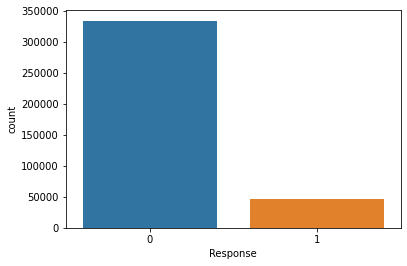

In [9]:
sns.countplot(x='Response', data=df_train)
plt.show()

In [10]:
#Calculate the Percentage
neg_response = len(df_train[df_train['Response']==0])
pos_response = len(df_train[df_train['Response']==1])
pct_neg = neg_response/(neg_response+pos_response)
pct_pos = pos_response/(neg_response+pos_response)

print(pct_neg*100)
print(pct_pos*100)

87.74366388618479
12.256336113815209


- Sebagian besar customer tidak tertarik dengan offer asuransi baru
- Terjadi data imbalance, yang akan diatasi dengan algoritma SMOTE

In [11]:
df_train.groupby('Response').mean()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
Response,,,,,,,,
0,190611.255476,38.178227,0.997694,26.336544,0.521742,30419.160276,114.851040,154.380243
1,190152.264504,43.435560,0.999122,26.762963,0.003383,31604.092742,91.869086,154.112246


- Rata-rata umur yang ingin berasuransi lebih tinggi daripada yang tidak
- Customer yang belum menggunakan asuransi kendaraan sebelumnya jauh lebih tertarik untuk menggunakan asuransi mobil baru di kedepannya

Text(0, 0.5, 'Proportion of Response')

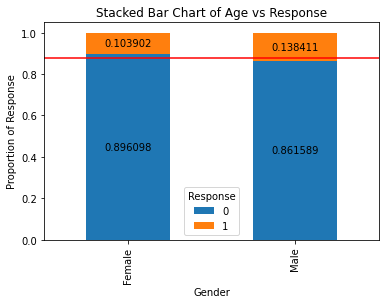

In [12]:
fig_gender = pd.crosstab(df_train.Gender, df_train.Response)
fig_gender = fig_gender.div(fig_gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
for c in fig_gender.containers:
    fig_gender.bar_label(c, label_type='center')
plt.axhline(y=pct_neg, color='red')
plt.title('Stacked Bar Chart of Age vs Response')
plt.xlabel('Gender')
plt.ylabel('Proportion of Response')

- Gender bukan merupakan variabel prediktor yang baik dalam hal respon asuransi
- Gender Pria lebih tertarik untuk menggunakan asuransi dibandingkan Wanita

Text(0, 0.5, 'Proportion of Response')

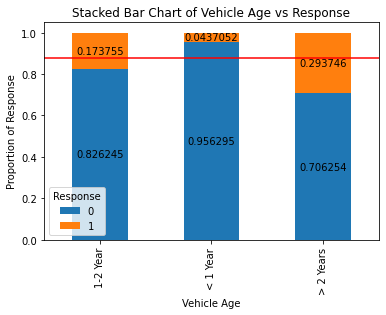

In [13]:
fig_vehicle_age = pd.crosstab(df_train.Vehicle_Age, df_train.Response)
fig_vehicle_age = fig_vehicle_age.div(fig_vehicle_age.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
for c in fig_vehicle_age.containers:
    fig_vehicle_age.bar_label(c, label_type='center')
plt.axhline(y=pct_neg, color='red')
plt.title('Stacked Bar Chart of Vehicle Age vs Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Proportion of Response')

- Vehicle Age merupakan indikator baik untuk variabel prediktor
- Penguna kendaraan dengan umur yang lama lebih tertarik untuk menggunakan asuransi

Text(0, 0.5, 'Proportion of Response')

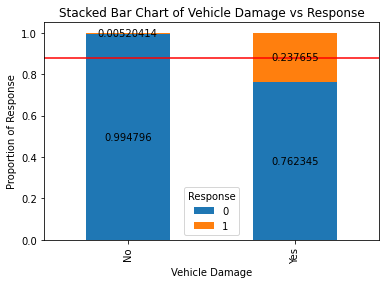

In [14]:
fig_vehicle_dmg = pd.crosstab(df_train.Vehicle_Damage, df_train.Response)
fig_vehicle_dmg = fig_vehicle_dmg.div(fig_vehicle_dmg.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
for c in fig_vehicle_dmg.containers:
    fig_vehicle_dmg.bar_label(c, label_type='center')
plt.axhline(y=pct_neg, color='red')
plt.title('Stacked Bar Chart of Vehicle Damage vs Response')
plt.xlabel('Vehicle Damage')
plt.ylabel('Proportion of Response')

- Vehicle Damage merupakan variabel yang bagus untuk prediktor
- Minat respon asuransi jauh lebih baik ketika kendaraan pernah mengalami kerusakan

# Create Dummy

In [15]:
#Categorical Column
cat_col = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
for var in cat_col:
  cat_list = pd.get_dummies(df_train[var], prefix=var)
  df_train1=df_train.join(cat_list)
  df_train=df_train1

data_vars=df_train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_col]

In [16]:
#Insert New Column & Variable
df_train_final=df_train[to_keep]
df_train_final.columns.values

array(['id', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response', 'Gender_Female', 'Gender_Male',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes'],
      dtype=object)

In [17]:
df_train_final.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0


In [18]:
df_train_final['Policy_Sales_Channel'].astype('category').value_counts()
#Terlalu banyak, 'Policy Sales Channel' diabaikan

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
84.0          1
123.0         1
144.0         1
143.0         1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [19]:
df_train_final['Region_Code'].astype('category').value_counts()
#Terlalu banyak, 'Policy Sales Channel' diabaikan

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [20]:
col_x = ['Age', 'Driving_License',	'Previously_Insured',	'Annual_Premium',	'Vintage',	'Gender_Female',
         'Gender_Male', 'Vehicle_Age_1-2 Year',	'Vehicle_Age_< 1 Year',	'Vehicle_Age_> 2 Years',	'Vehicle_Damage_No',	'Vehicle_Damage_Yes']

# Split Train Test

In [21]:
#Penempatan Variabel
x = df_train_final.loc[:, df_train_final.columns.isin(col_x)]
y = df_train_final.loc[:, df_train_final.columns == 'Response']

#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=0)

#Menentukan panjang variabel sebelum digunakan algoritma SMOTE
print('Panjang jumlah data sebelum algoritma SMOTE', len(X_train))
print('Panjang jumlah variabel YES sebelum algoritma SMOTE', len(y_train[y_train['Response']==1]))
print('Panjang jumlah variabel NO sebelum algoritma SMOTE', len(y_train[y_train['Response']==0]))

Panjang jumlah data sebelum algoritma SMOTE 285831
Panjang jumlah variabel YES sebelum algoritma SMOTE 35035
Panjang jumlah variabel NO sebelum algoritma SMOTE 250796


# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_test.shape

(95278, 12)

#SMOTE Algorithm

In [24]:
#Memasukkan Algoritma SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

columns = pd.DataFrame(X_train).columns.isin(col_x)
os_data_x, os_data_y = os.fit_resample(X_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['Response'])

#Panjang variabel setelah oversampling SMOTE
print('Panjang jumlah data setelah algoritma SMOTE', len(os_data_x))
print('Panjang jumlah variabel YES setelah algoritma SMOTE', len(os_data_y[os_data_y['Response']==1]))
print('Panjang jumlah variabel NO setelah algoritma SMOTE', len(os_data_y[os_data_y['Response']==0]))

Panjang jumlah data setelah algoritma SMOTE 501592
Panjang jumlah variabel YES setelah algoritma SMOTE 250796
Panjang jumlah variabel NO setelah algoritma SMOTE 250796


- Algoritma 'Response' YES di oversampling menjadi sama dengan jumlah 'Response' NO sehingga jumlah data menjadi seimbang

# Recursive Feature Elimination Cross Validation (RFECV)

In [25]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
logit = LogisticRegression()
rfe = RFECV(estimator=logit,
            cv=10,
            scoring='accuracy')
rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print("Optimum number of features: %d" % rfe.n_features_)

X_train_selected = rfe.transform(os_data_x)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool']. An error will be raised in 1.2.
  warnings.warn(


[False False  True False False False False False False False False  True]
[ 4  8  1  9 11 10  7  5  3  6  2  1]
Optimum number of features: 2


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool']. An error will be raised in 1.2.
  warnings.warn(


In [26]:
#Menerapkan algoritma RFE ke dalam Test Set
X_test_selected = rfe.transform(X_test)

In [27]:
X_test_selected.shape

(95278, 2)

# Building The Logistic Regression Model

## Predicting The Logistic Regression Model

In [28]:
#Training Model
logit.fit(X_train_selected, os_data_y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
X_test_selected.shape

(95278, 2)

In [35]:
pd.DataFrame(X_test_selected).columns

RangeIndex(start=0, stop=2, step=1)

In [30]:
#Predicting The Model
from sklearn import metrics
y_pred = logit.predict(X_test_selected)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit.score(X_test_selected, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


[[49269 34334]
 [  254 11421]]


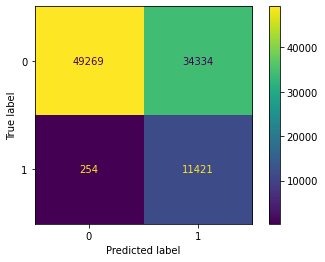

<Figure size 1440x576 with 0 Axes>

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=logit.classes_)

disp.plot()
plt.figure(figsize=(20,8))
plt.show()